In [17]:
import os

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [19]:
orig_df = pd.read_excel("Assignment3_cluster2.xlsx",sheet_name='2559')
orig_df.head()

,ministry,personnel,operation,invest,subsidy,others
0,a,16930.0,72464.9,77258.3,222588.0,33480.2
1,b,3838.1,2746.4,7147.3,7766.3,14503.2
2,c,88633.6,24333.2,7754.6,3596.0,82143.9
3,d,11740.9,6249.8,4528.4,936.2,175718.8
4,e,2794.9,2490.8,228.4,1022.4,1478.6


<AxesSubplot:>

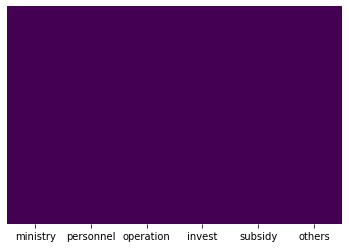

In [20]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
orig_df.describe()

,personnel,operation,invest,subsidy,others
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,28978.913636,10377.600000,17684.459091,33222.318182,16338.350000
std,60538.929275,16444.896873,30473.823649,76105.035061,40178.256841
min,398.300000,321.000000,228.400000,25.000000,109.200000
25%,2161.825000,1254.325000,540.950000,957.750000,858.975000
50%,6151.800000,3157.100000,3761.050000,2317.700000,1378.800000
75%,16888.325000,12228.625000,19284.050000,8235.350000,5903.950000
max,271166.300000,72464.900000,124107.400000,256970.300000,175718.800000


In [22]:
orig_df.columns

Index(['ministry', 'personnel', 'operation', 'invest', 'subsidy', 'others'], dtype='object')

In [23]:
df = orig_df[['personnel','operation','invest', 'subsidy','others']]
df

,personnel,operation,invest,subsidy,others
0,16930.0,72464.9,77258.3,222588.0,33480.2
1,3838.1,2746.4,7147.3,7766.3,14503.2
2,88633.6,24333.2,7754.6,3596.0,82143.9
3,11740.9,6249.8,4528.4,936.2,175718.8
4,2794.9,2490.8,228.4,1022.4,1478.6
5,1241.4,1086.6,2269.5,1260.3,1279.0
6,2766.6,3567.8,962.8,2548.1,232.9
7,24772.2,13669.2,44926.5,1985.5,1050.3
8,8976.3,2135.9,124107.4,39.4,842.3
9,10376.1,6503.9,13746.2,3538.4,1713.3


In [24]:
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.061055,1.000000,0.621816,0.866188,0.190029
1,0.012704,0.033619,0.055852,0.030128,0.081966
2,0.325870,0.332838,0.060754,0.013898,0.467142
3,0.041890,0.082180,0.034711,0.003546,1.000000
4,0.008851,0.030076,0.000000,0.003882,0.007798


In [25]:
df_normalized.describe()

,0,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.105554,0.139396,0.140912,0.129200,0.092416
std,0.223582,0.227946,0.245997,0.296192,0.228793
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006513,0.012937,0.002523,0.003630,0.004270
50%,0.021249,0.039312,0.028517,0.008923,0.007230
75%,0.060901,0.165054,0.153825,0.031954,0.032998
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

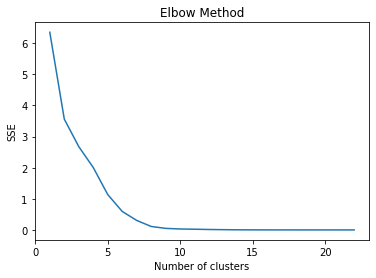

In [26]:
max_k = 23
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [27]:
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [28]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

,personnel,operation,invest,subsidy,others,cluster_id
0,16930.0,72464.9,77258.3,222588.0,33480.2,5
1,3838.1,2746.4,7147.3,7766.3,14503.2,0
2,88633.6,24333.2,7754.6,3596.0,82143.9,3
3,11740.9,6249.8,4528.4,936.2,175718.8,3
4,2794.9,2490.8,228.4,1022.4,1478.6,0
5,1241.4,1086.6,2269.5,1260.3,1279.0,0
6,2766.6,3567.8,962.8,2548.1,232.9,0
7,24772.2,13669.2,44926.5,1985.5,1050.3,0
8,8976.3,2135.9,124107.4,39.4,842.3,4
9,10376.1,6503.9,13746.2,3538.4,1713.3,0


In [29]:
df.cluster_id.value_counts()

0    16
3     2
5     1
4     1
2     1
1     1
Name: cluster_id, dtype: int64

In [30]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.37831880186026495


In [31]:
df[df.cluster_id==0].mean()

personnel     13957.85625
operation      4802.31875
invest         6987.58750
subsidy        4728.63125
others         2141.13750
cluster_id        0.00000
dtype: float64

In [32]:
df.to_csv('cluster_res_kmean59.csv')